# 회귀 알고리즘과 모델 규제
## 선형 회귀

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 농어 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5,	27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                     	36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0,	40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])

In [67]:
# k-최근접 이웃 알고리즘의 문제점: 훈련 세트 밖의 샘플 예측

# 50cm, 100cm 길이의 농어 무게 예측: 동일한 예측값
# -> 최근접이웃 데이터가 같기때문에 생기는 문제
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 객체 생성
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)
print('50cm:', knr.predict([[50]]))
print('100cm:', knr.predict([[100]]))

50cm: [1033.33333333]
100cm: [1033.33333333]


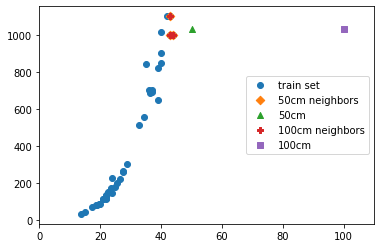

In [68]:
# 50cm, 100cm 길이의 농어의 이웃 및 산점도 비교

# 50cm 농어의 이웃을 구함
distances_50, indexes_50 = knr.kneighbors([[50]])
# 100cm 농어의 이웃을 구함
distances_100, indexes_100 = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target, label='train set')

# 훈련 세트 중에서 50cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50], train_target[indexes_50], marker='D', label='50cm neighbors')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^', label='50cm')

# 훈련 세트 중에서 100cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50], train_target[indexes_50], marker='P', label='100cm neighbors')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='s', label='100cm')

plt.xlim(0, 110)
plt.legend(loc=5)
plt.show()

In [69]:
# 훈련데이터에서 이웃 데이터의 인덱스 확인
print('50cm neighbor indexes:', indexes_50)
print('100cm neighbor indexes:', indexes_100)

50cm neighbor indexes: [[34  8 14]]
100cm neighbor indexes: [[34  8 14]]


In [70]:
# 이웃 데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

# k-최근접 이웃 회귀: 이웃의 평균을 구함
# 50cm 농어와 100cm 농어의 이웃이 동일 -> 무게 예측값(1033g)이 동일한 문제점 발생
# 해결방안: 선형 회귀(Linear Regression)

1033.3333333333333
1033.3333333333333


In [71]:
# 선형 회귀(Linear Regression)
# 데이터를 가장 잘 표현할 수 있는 직선 방정식을 찾는 알고리즘
# 특성과 타킷 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾음
# 특성과 타킷 사이의 관계: 선형 방정식의 계수(기울기) 와 절편에 저장

# LinearRegression 클래스 사용
# sklearn.linear_model 패키지
# fit(), score(), predict() 메소드

In [75]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print('50cm: ', lr.predict([[50]]))

# 기울기(a): coef_, 절편(bias): intercept_
print(lr.coef_, lr.intercept_)

# 하나의 특성(농어의 길이)만 사용했기 때문에 "lr.coef_" 배열의 원소는 1개


50cm:  [1241.83860323]
[39.01714496] -709.0186449535474


(42,)

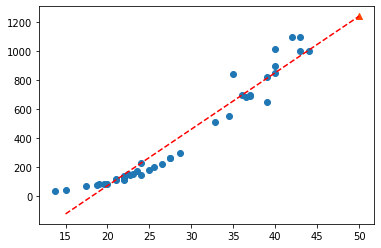

In [25]:
# 기울기와 절편을 이용한 1차 방정식 그래프
import matplotlib.pyplot as plt

# 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
# plot([x축 데이터:시작, 끝], [y축 데이터:시작, 끝])
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='red', linestyle='--')

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^', color='orangered')

plt.show()

In [26]:
print('train data score: ', lr.score(train_input, train_target))
print('test data score: ', lr.score(test_input, test_target))

# 전체적으로 과소 적합(훈련 세트와 테스트 세트의 점수가 모두 낮음)

train data score:  0.9398463339976041
test data score:  0.824750312331356


In [31]:
print(15*lr.coef_ + lr.intercept_)
print(18*lr.coef_ + lr.intercept_)

# 농어무게가 0이하로 내려갈 수 있는 문제점 발생

[-123.7614705]
[-6.71003561]


## 다항 회귀

In [ ]:
# 다항 회귀(Polynomial Regression)

# 농어의 길이와 무게에 대한 산점도: 일직선(1차 방정식)으로 표현하기 어려움
# 무게가 0 이하일 가능성 발생 -> 모델이 더 복잡할 필요성이 있음

# 최적의 곡선(2차 방정식)을 구함
# 길이를 제곱한 항을 훈련 세트에 추가해야 됨

In [32]:
# 길이를 제곱한 데이터를 훈련 세트에 추가
# column_stack()사용(broadcasting 적용)

# 훈련 데이터
# 제곱한 input배열을 기존 input배열과 합치기(길이^2, 길이)
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


In [33]:
# 선형 회귀 모델 재훈련
# 제곱한 데이터를 이용하여 선형 회귀 모델을 다시 훈련, 타깃값은 그대로 사용함

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # 50cm 농어의 무게 예측
print(lr.coef_, lr.intercept_) # 순서대로 a, b, c로 사용

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


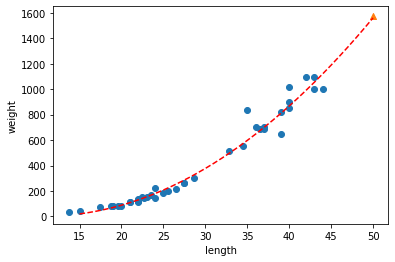

In [37]:
# 훈련 세트의 산점도와 2차 방정식 그래프
 
# 구간별 직선을 그리기 위해 15에서 50까지 정수 배열을 만듬
point= np.arange(15, 51) # 농어의 길이 배열

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05, color='red', linestyle='--')

# 50cm 농어 데이터(무게:1574g)
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 과소 적합이 남아있긴하지만 테스트 세트의 점수가 높음

0.9706807451768623
0.9775935108325122


## 다중 회귀

In [ ]:
# 다중 회귀 (Multiple Regression)
# 여러 특성을 사용한 선형 회귀
# 길이, 높이, 두께 사용
# 다양한 특성의 조합을 생성

# PolynomialFeatures 클래스 사용

# 특성 공학 (Feature engineering)
# 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업
# 특성이 2개인 경우 평면을 학습

In [40]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('https://bit.ly/perch_csv')

# DataFrame을 Numpy의 array로 변환
perch_full = df.to_numpy() 
print(perch_full[:5])
print(perch_full.shape)

# perch_full: length, height, width 데이터

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
(56, 3)


In [41]:
import numpy as np

# 데이터(perch_weight)는 기존과 동일
perch_weight = np.array(
[5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
1000.0, 1000.0])

# perch_full, perch_weight를 훈련 세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [ ]:
# 사이킷런의 변환기 (Transformer)

# 다항 특성 만들기
# PolynomialFeatures 클래스 사용
# 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가

# PloynomialFeatures(include_bias=True)
# include_bias=True: bias(절편, 0차항) 추가
# include_bias=False: bias 삭제

# fit([a, b]): 특성 조합을 찾음
# [1, a, b, a*b, a^2, b^2] 추가

# transform([[a, b]]): 특성 조합을 실제 데이터로 변환
# [1, a, b, a*b, a^2, b^2] 로 변환

In [42]:
# PolynomialFeatures(include_bias=True)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures() # include_bias=True (기본값)

poly.fit([[2, 3]]) # 2, 3의 조합을 찾음(2^2, 3^2, 2x3)
print(poly.transform([[2, 3]])) # 특성 조합을 데이터로 변환

[[1. 2. 3. 4. 6. 9.]]


In [43]:
# PolynomialFeatures(include_bias=False)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # include_bias=False: 1 제거

poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [45]:
# 훈련 세트(train_input)을 사용하여 다항 특성 만들기

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input) # train_input 데이터를 이용하여 총 9개의 특성이 만들어짐

print(train_poly[0:3])
print(train_poly.shape)
test_poly = poly.transform(test_input) # 테스트 세트 변환: fit()호출 안함
# 훈련 세트를 기준으로 만들어진 특성을 이용하여 테스트 세트를 변환하기 위함

[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
(42, 9)


In [47]:
# get_feature_names(): 각 특성의 조합을 알려줌
# x0:length x1:width x2:height
print(poly.get_feature_names_out())
# poly.get_feature_names() -> poly.get_feature_names_out() 메서드명 바뀜

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [48]:
# 다중 회귀 모델 훈련
# 선형 회귀 모델 훈련과 동일 (여러 개의 특성을 사용할 뿐임)
# 특성이 늘어나면 선형 회귀의 정확도 증가

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

# 훈련세트 점수
print(lr.score(train_poly, train_target))

0.9903183436982126


In [49]:
# 테스트 세트 점수
print(lr.score(test_poly, test_target))

0.9714559911594125


In [50]:
# degree 증가
# 고차항의 최대 차수 지정
# 3제곱, 4제곱, 5제곱 항 추가
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [51]:
# 선형 회귀 모델 훈련 및 훈련 세트 점수 계산
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

# 테스트 세트 점수 계산
print(lr.score(test_poly, test_target))
# 점수 마이너스: 훈련 세트에 과대 적합

0.9999999999997232
-144.40564483377855


In [ ]:
# 규제 (Regularization)
# 모델이 훈련 세트에 과대 적합되는 것을 방지
# 선형 회귀 모델: 특성에 곱해지는 계수의 크기를 작게 줄임

# 규제 전에 표준화 과정이 필요
# 각 특성의 크기(스케일)가 다르기 때문에 표준화 과정이 필요
# StandardScaler 클래스 사용

# L1 규제 (L1 Regularization)
# 계수(가중치)의 합을 더한 값에 규제 강도(ƛ)를 곱하여 오차에 더함
# 어떤 가중치는 0이 됨: 일부 변수가 중요할때
# 라쏘(Lasso) 모델: 계수(가중치)의 절대값을 기준으로 규제

# L2 규제 (L2 Regularization)
# 각 계수(가중치) 제곱의 합에 규제 강도(ƛ)를 곱합
# ƛ를 크게 하면 가중치가 더 감소(규제 강화), ƛ를 작게 하면 가중치가 증가
# 각각의 변수가 골고루 중요할때
# 릿지(Ridge) 모델: 계수를 제곱한 값을 기준으로 규제


In [53]:
# StandardScaler 클래스를 사용한 표준화
# 평균과 표준 편차 사용
# fit(), transform() 사용

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [54]:
# 릿지 회귀
# sklearn.linear_model 패키지
# fit()로 훈련, score()메소드로 평가
# Ridge(alpha=1.0): alpha값이 크면 규제 강도가 세짐 (계수 값을 더 줄임)

from sklearn.linear_model import Ridge

ridge = Ridge() # alpha=1.0
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) #훈련 세트 점수 확인

0.9896101671037343


In [55]:
# 테스트 세트의 점수가 정상으로 돌아옴
print(ridge.score(test_scaled, test_target))

0.9790693977615387


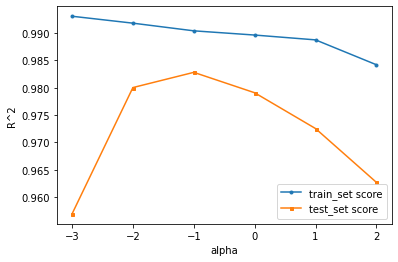

In [56]:
# 적절한 alpha 값 찾기
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    #훈련 세트와 테스트 세트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, label='train_set score', marker='o', markersize=3)
plt.plot(np.log10(alpha_list), test_score, label='test_set score', marker='s', markersize=3)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

# alpha값을 변경하면서 결정 계수(R2)의 값을 비교
# alpha=0.1 (-1은 log 적용 10^-1/log10^-1=0.1)일 때, 두 그래프가 가장 가까움 => 적합

In [57]:
# 릿지 회귀: 최적의 alpha적용
# alpha=0.1 적용
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [64]:
# 라쏘(Lasso) 회귀
# 불필요한 계수를 급격히 감소, 0으로 만들어 제거
# sklearn.linear_model 패키지
# fit()로 훈련, score()메소드로 평가
# Lasso(alpha=1.0): alpha값이 크면 규제 강도가 세짐 (계수 값을 더 줄임)
                  # alpha=0.0: 기존 선형 회귀와 동일
                  
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


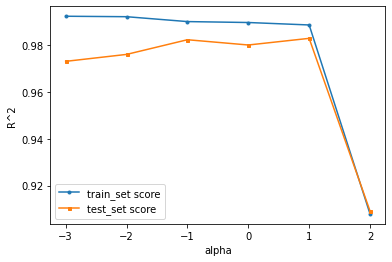

In [62]:
# 라쏘 회귀: 적절한 규제 강도 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score, label='train_set score', marker='o', markersize=3)
plt.plot(np.log10(alpha_list), test_score, label='test_set score', marker='s', markersize=3)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

# alpha값을 변경하면서 결정 계수(R2)의 값을 비교
# alpha=10일 때, 최적 (10^1=10)

In [63]:
# 라쏘 회귀: 최적의 alpha적용
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695
